In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tested.csv') 

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

df.info()

df.describe()


The dataset has 418 rows and 12 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)


Missing values in each column:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [16]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Drop duplicate rows
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


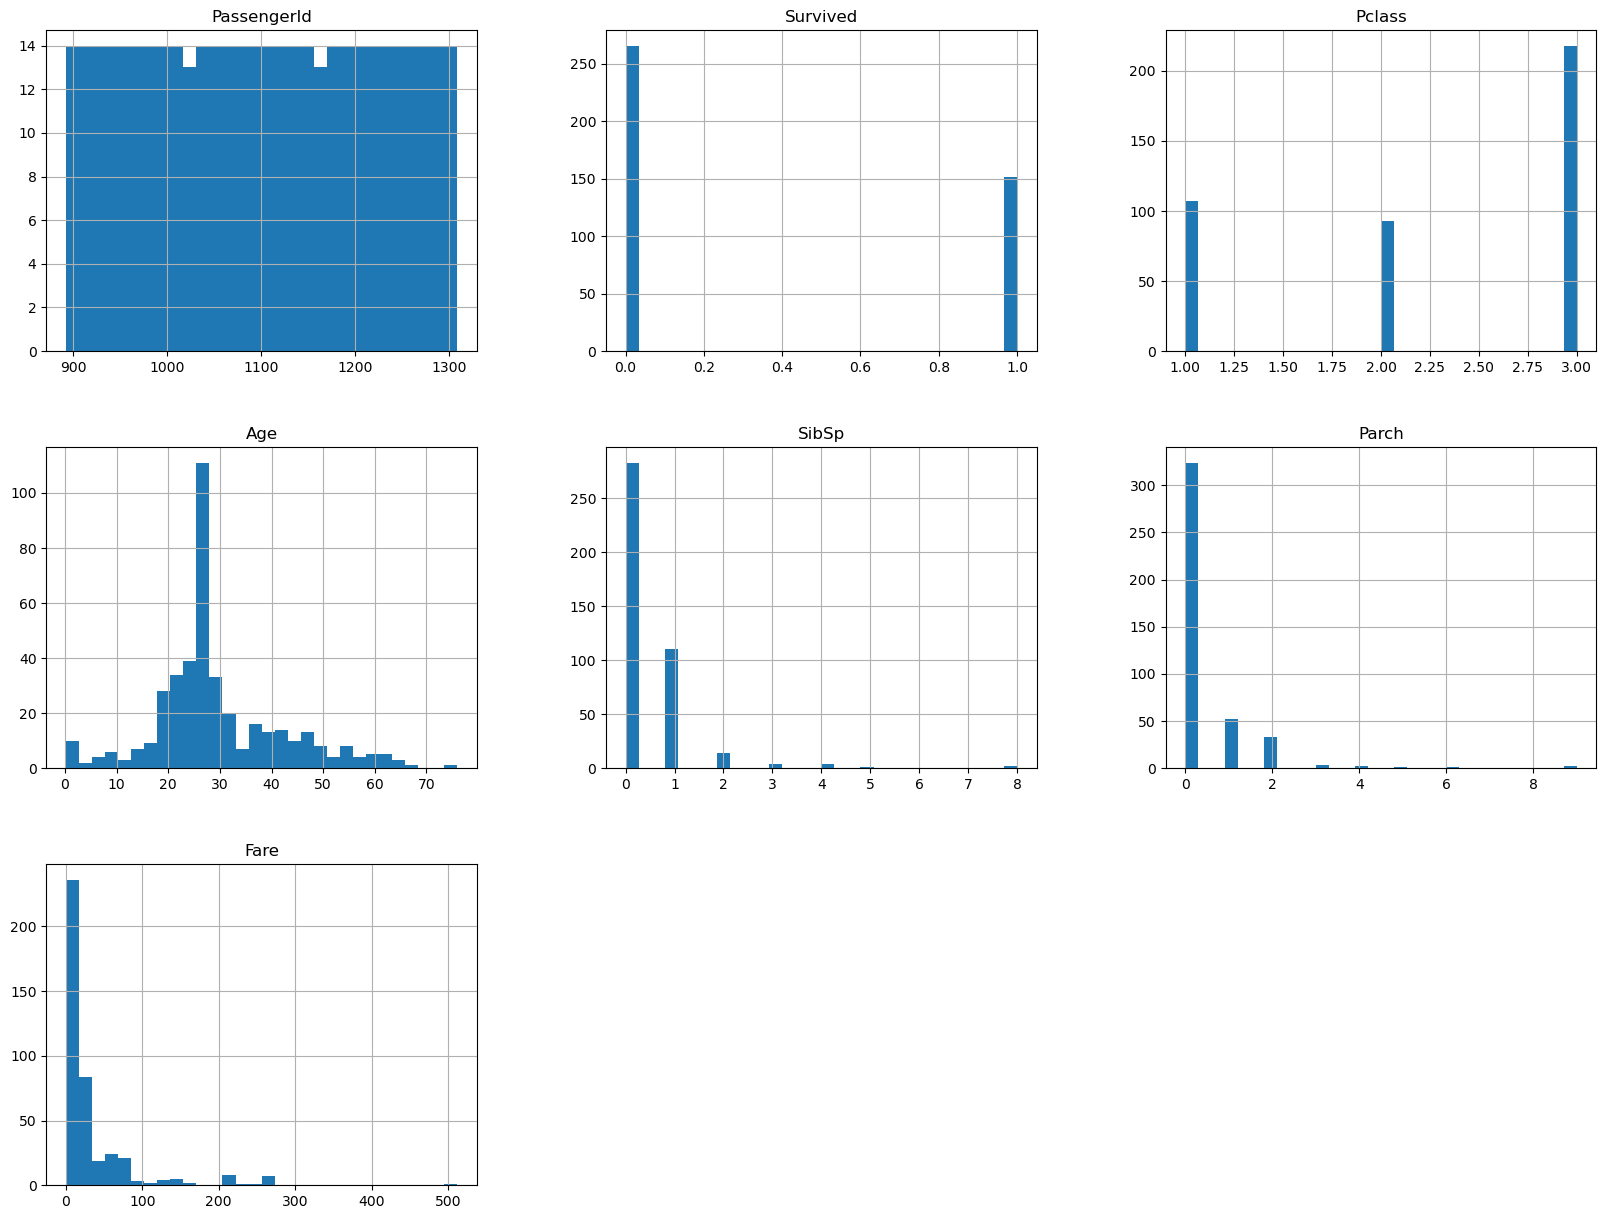

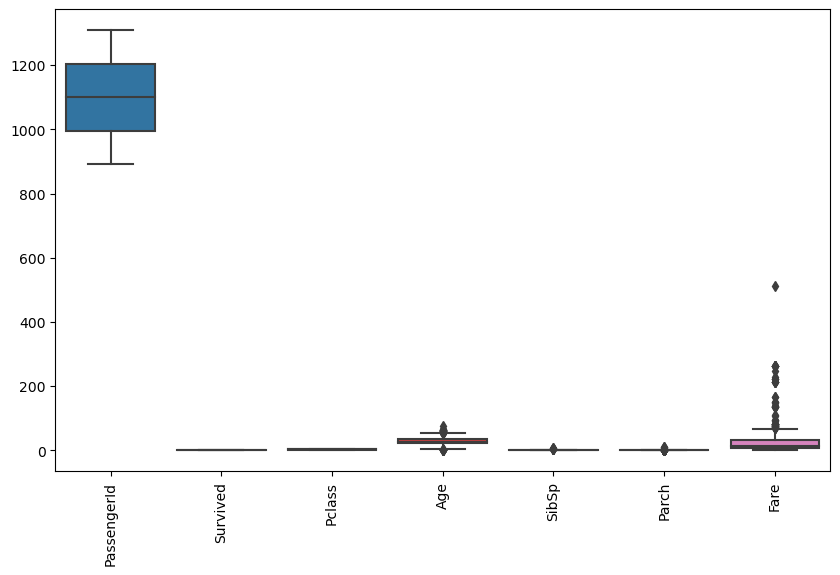

In [18]:
# Histograms for numerical columns
df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(20, 15))
plt.show()

# Boxplots for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.show()


Number of entries with cabin information: 91
Survival rate by deck:
 deck
A    0.428571
B    0.500000
C    0.542857
D    0.384615
E    0.444444
F    0.375000
G    1.000000
Name: Survived, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_8728\1053379994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_cabins['deck'] = df_with_cabins['Cabin'].str[0]


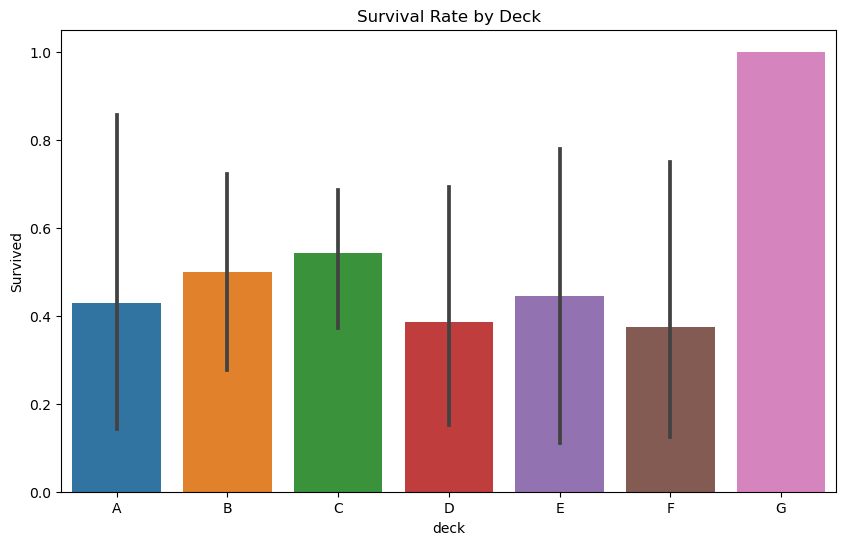

In [37]:

# Filter out rows where cabin information is missing
df_with_cabins = df.dropna(subset=['Cabin'])
print(f"Number of entries with cabin information: {df_with_cabins.shape[0]}")

# Extract the deck information from the cabin column
df_with_cabins['deck'] = df_with_cabins['Cabin'].str[0]

# Display the first few rows to verify
df_with_cabins[['Cabin', 'deck']].head()

# Calculate survival rate by deck
survival_rate_by_deck = df_with_cabins.groupby('deck')['Survived'].mean()
print("Survival rate by deck:\n", survival_rate_by_deck)

# Bar plot for survival rate by deck
plt.figure(figsize=(10, 6))
sns.barplot(x='deck', y='Survived', data=df_with_cabins, order=sorted(df_with_cabins['deck'].unique()))
plt.title('Survival Rate by Deck')
plt.show()


Overall survival rate: 0.38
Survival rate by sex:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
Survival rate by class:
 class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64
Survival rate by sex and class:
 sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64


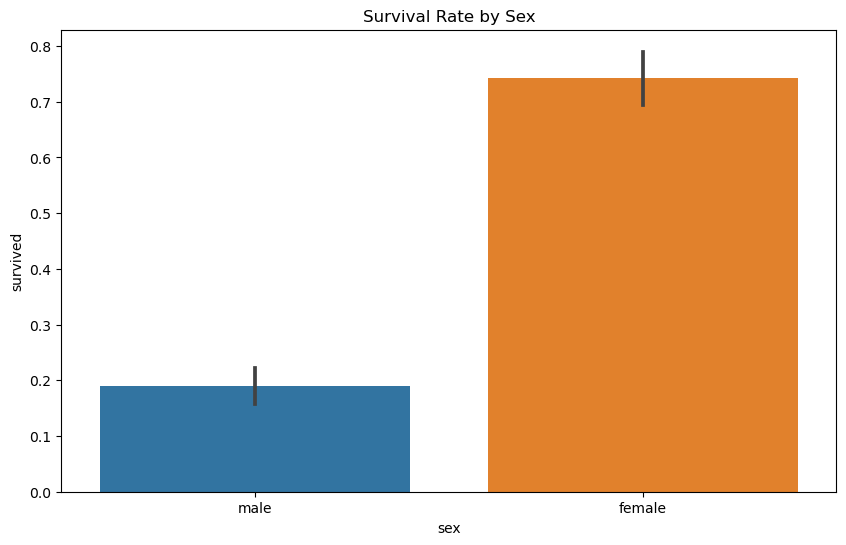

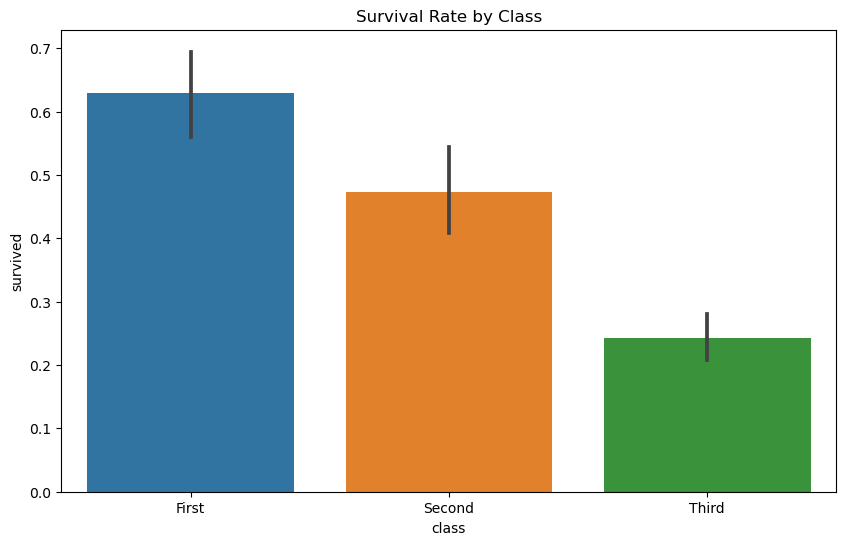

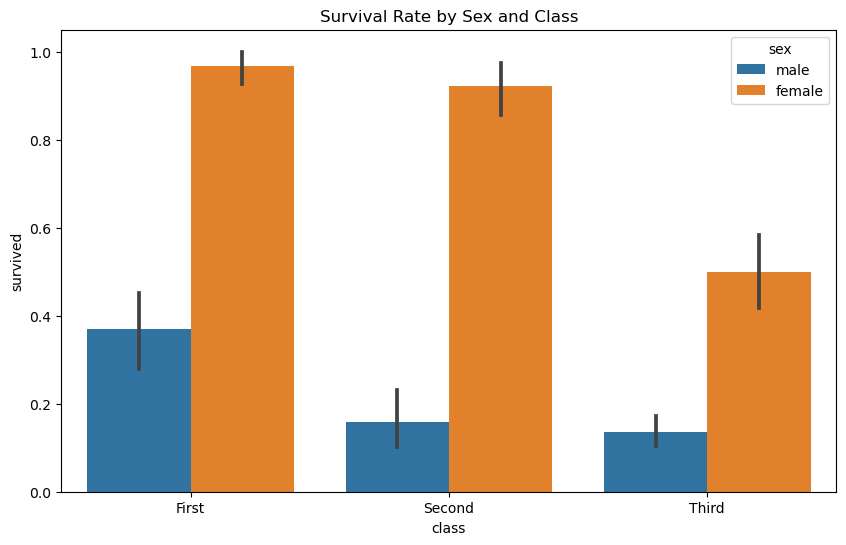

In [41]:

# Calculate overall survival rate
overall_survival_rate = df['Survived'].mean()
print(f"Overall survival rate: {overall_survival_rate:.2f}")

# Calculate survival rate by sex
survival_rate_by_sex = df.groupby('sex')['survived'].mean()
print("Survival rate by sex:\n", survival_rate_by_sex)

# Calculate survival rate by class
survival_rate_by_class = df.groupby('class')['survived'].mean()
print("Survival rate by class:\n", survival_rate_by_class)

# Bar plot for survival rate by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Bar plot for survival rate by class
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

# Bar plot for survival rate by sex and class
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='survived', hue='sex', data=df)
plt.title('Survival Rate by Sex and Class')
plt.show()
